# M2 Money Supply and CPI Analysis using FRED
Place the following notice prominently on your application: "This product uses the FRED® API but is not endorsed or certified by the Federal Reserve Bank of St. Louis."

**In order for the FRED API to work, you are going to need an API KEY, you can obtain one on the FRED website or if you don't want to register can send me a message to give you mine**
    

# 1.0 Do all the necessary imports
* pandas
* numpy
* plotly.express
* matplotlib.pyplot
* fredapi

Create a fred object that we are going to use to search for info and get the results from the FRED website

In [44]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib as mpl

from fredapi import Fred
from use_key import get_api_key

In [3]:
fred = Fred(api_key=get_api_key())

# 2.0 Find the Real M2 Money Supply Info

* Search the FRED database to find the information needed and then get the series converting it to a pandas dataframe.
* Create a variable to store the results from the year 2000 until 2023, we won't visualise all the data that they have
* Show a basic plot with the information. 

<Axes: >

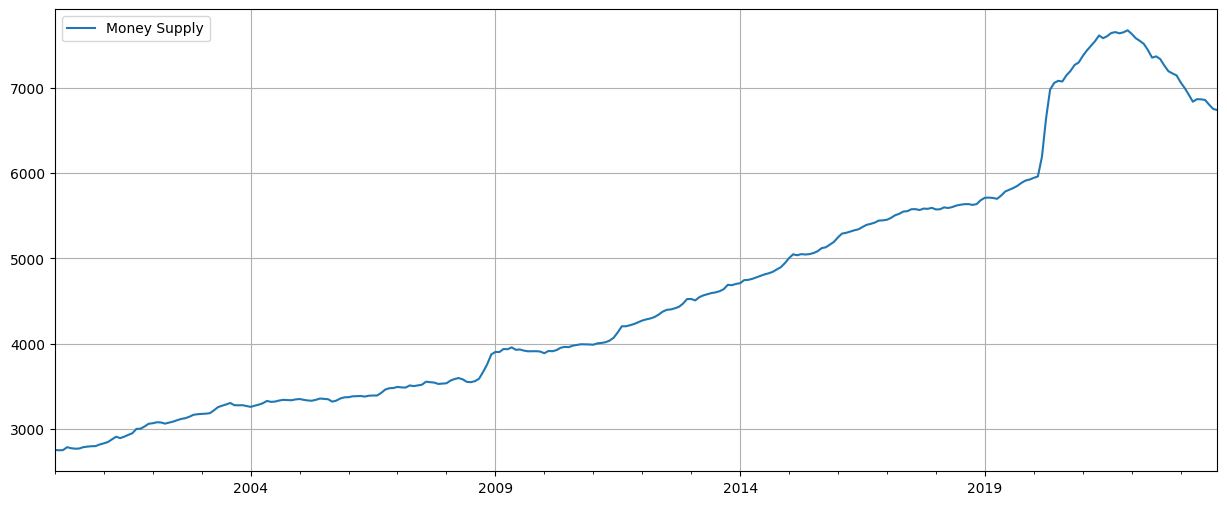

In [4]:
m2_df = fred.search(
    text='Real M2 Money Stock',
)
m2_df = m2_df.query('title == "Real M2 Money Stock"')
m2_df = fred.get_series(series_id=m2_df.index[0]).to_frame(name='Money Supply')
m2_df_2000_2023 = m2_df.loc['2000-01-01': '2023-11-01']
# line_chart = px.line(m2_df_2000_2023)
# line_chart.show()
m2_df_2000_2023.plot(kind='line', figsize=(15, 6), grid=True)

# 2.1 Convert the values into monthly percentage '%' change
Convert the current months value into a percentage change from the previous one, and visualise the data into a barchart.

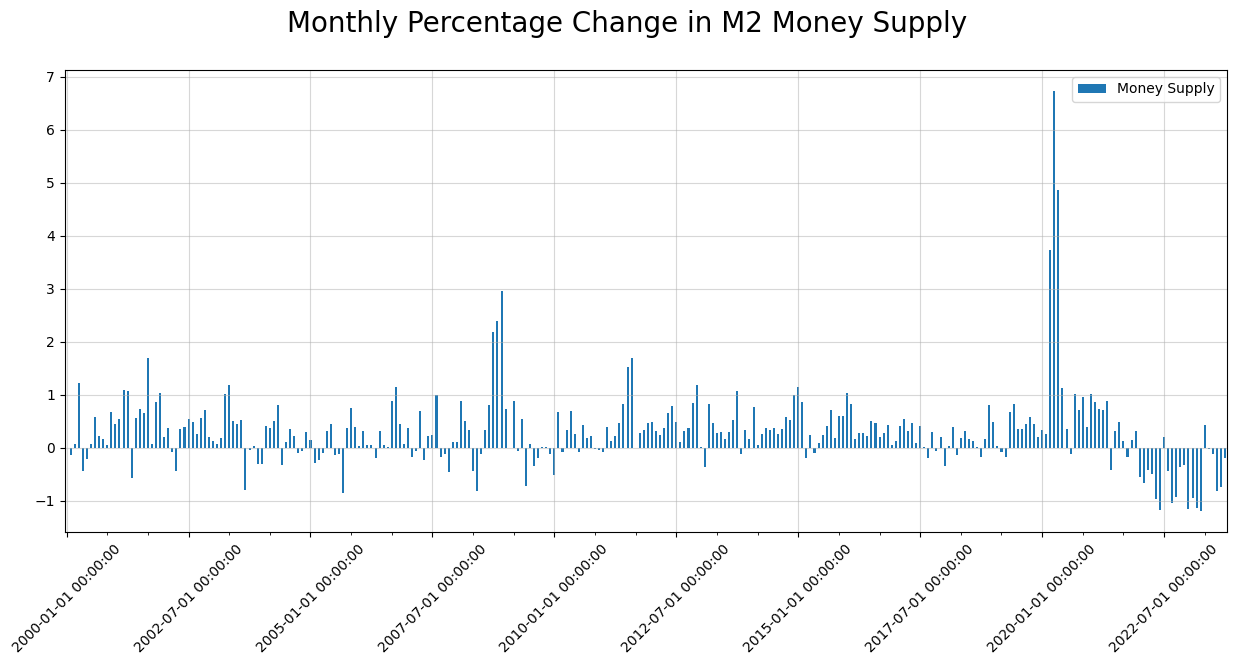

In [165]:
from copy import copy
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator


prev_value = None
m2_df_2000_2023_monthly_pchange = copy(m2_df_2000_2023)
for index, value in m2_df_2000_2023_monthly_pchange['Money Supply'].items():
    if prev_value is None:
        m2_df_2000_2023_monthly_pchange.at[index, 'Money Supply'] = 0
    else:
        difference = value - prev_value
        percentage = round(((difference / value) * 100), 2)
        m2_df_2000_2023_monthly_pchange.at[index, 'Money Supply'] = percentage
    prev_value = value

bar_chart = px.bar(m2_df_2000_2023_monthly_pchange, title='Percentage Increase Of Money Supply By Month')
bar_chart.show()

fig, ax = plt.subplots(figsize=(15, 6))
fig.suptitle('Monthly Percentage Change in M2 Money Supply', fontsize=20)
m2_df_2000_2023_monthly_pchange.plot(kind='bar', ax=ax)

# cdf = mdates.ConciseDateFormatter(ax.xaxis.get_major_locator())
# ax.xaxis.set_major_formatter(cdf)
ax.grid(True, alpha=0.5)
ax.xaxis.set_major_locator(MultipleLocator(30))
ax.xaxis.set_minor_locator(MultipleLocator(10))

for tick_label in ax.get_xticklabels():
    tick_label.set_rotation(45)

plt.show()





# 3.0 Find the median CPI monthly info
Using the same steps as before, I find the median CPI, filtered by frequency, Monthly and visualize it using a barchart.
I have used the plotly express and the matplotlib visualization tools.
Plotly gives us a better, interactive plot, easier to embed into HTML

In [6]:
cpi_df = fred.search(
    text='cpi',
    order_by='popularity',
    filter=('frequency', 'Monthly')
)
median_cpi_df = fred.get_series(series_id='MEDCPIM158SFRBCLE')
median_cpi_df = median_cpi_df.to_frame(name='Median CPI')
median_cpi_df_2020_2023 = median_cpi_df.loc['2000-01-01':'2023-11-01']
bar_chart = px.bar(median_cpi_df_2020_2023, title='Median CPI Monthly')
bar_chart.show()

# 4.0 Visualizing the M2 Money Supply monthly percentage change vs monthly median CPI change

For the purpose I have merged the two pandas dataframes into a larger one using the <br> ```pd.merge(df1, df2, right_index=True, left_index=True)``` <br>
Then I have visualized it using the plotly express.

**We can notice two trends**
* In periods of financial turmoil, the M2 Money Supply increases sharply, which indicates more money being created to be inserted into the economy
* CPI drops in the months after, but increases steeply shortly after that.

In [169]:
merged_cpi_money_supply = pd.merge(
    median_cpi_df_2020_2023,
    m2_df_2000_2023_monthly_pchange,
    right_index=True,
    left_index=True,
)
fig = px.bar(merged_cpi_money_supply, title='Bar Chart AVG CPI and M2 Money Supply', barmode='group')
fig.show()

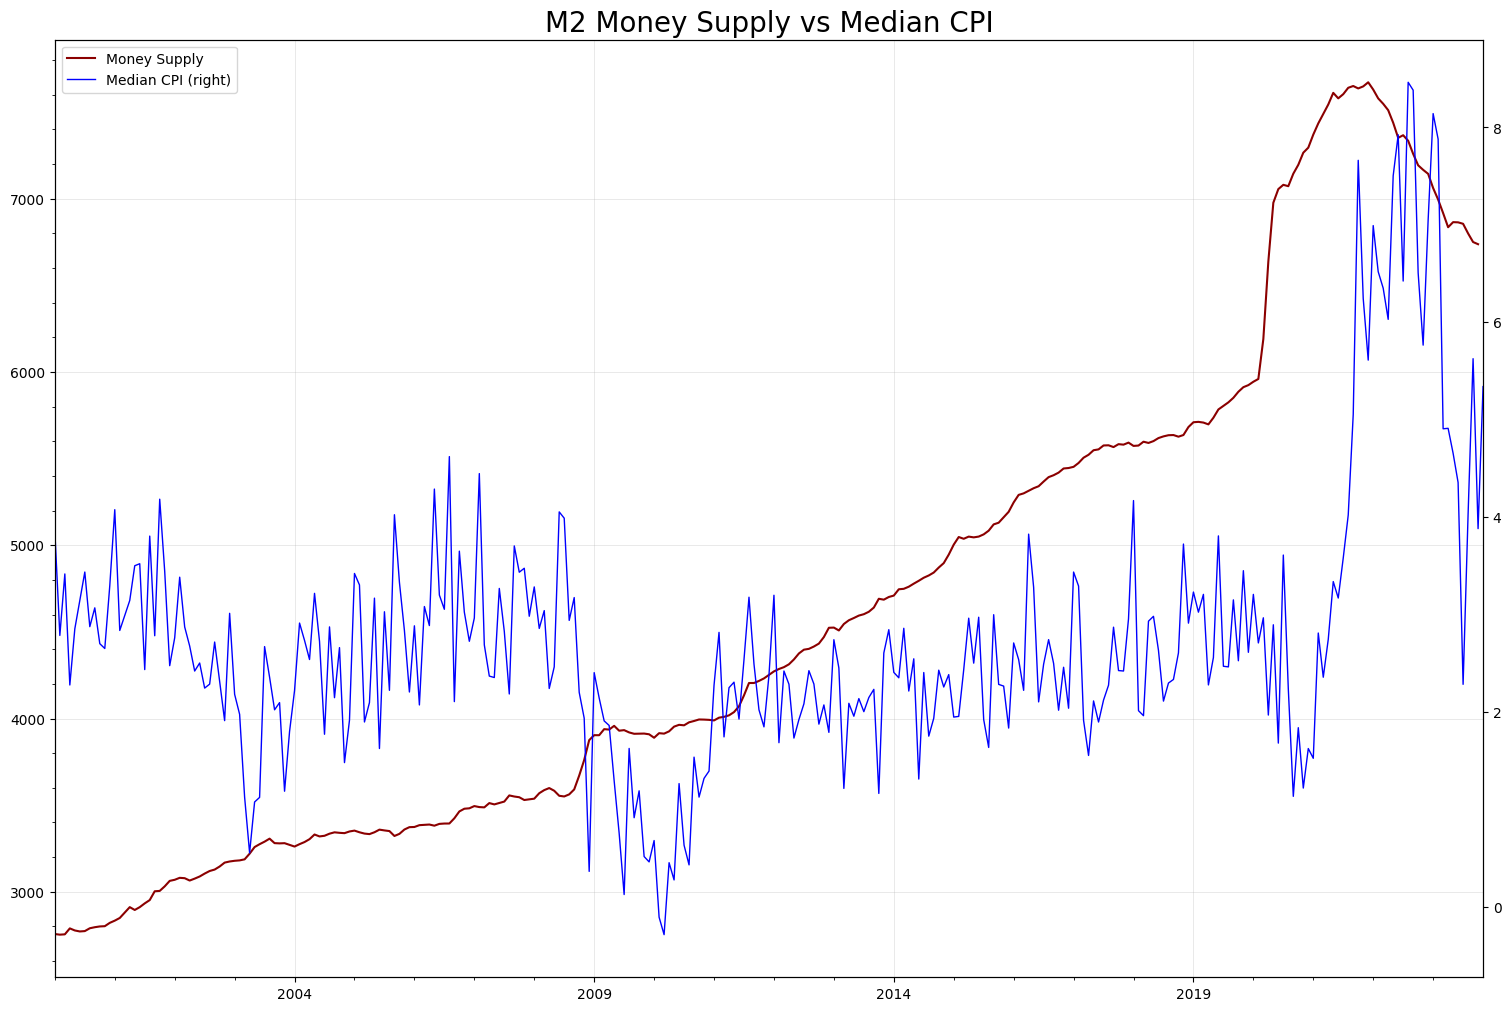

In [8]:
# m2_df_2000_2023
# median_cpi_df_2020_2023
from matplotlib.ticker import MultipleLocator

fig, ax = plt.subplots(figsize=(15, 10), layout='constrained')


m2_df_2000_2023.plot(color='darkred', ax=ax, kind='line')
median_cpi_df_2020_2023.plot(kind='line', color='blue', secondary_y=True, ax=ax, lw=1)

ax.grid(True, alpha=0.4, linewidth=0.5)
ax.set_title('M2 Money Supply vs Median CPI', fontsize=20)
ax.yaxis.set_major_locator(MultipleLocator(1000))
ax.yaxis.set_minor_locator(MultipleLocator(200))


plt.show()



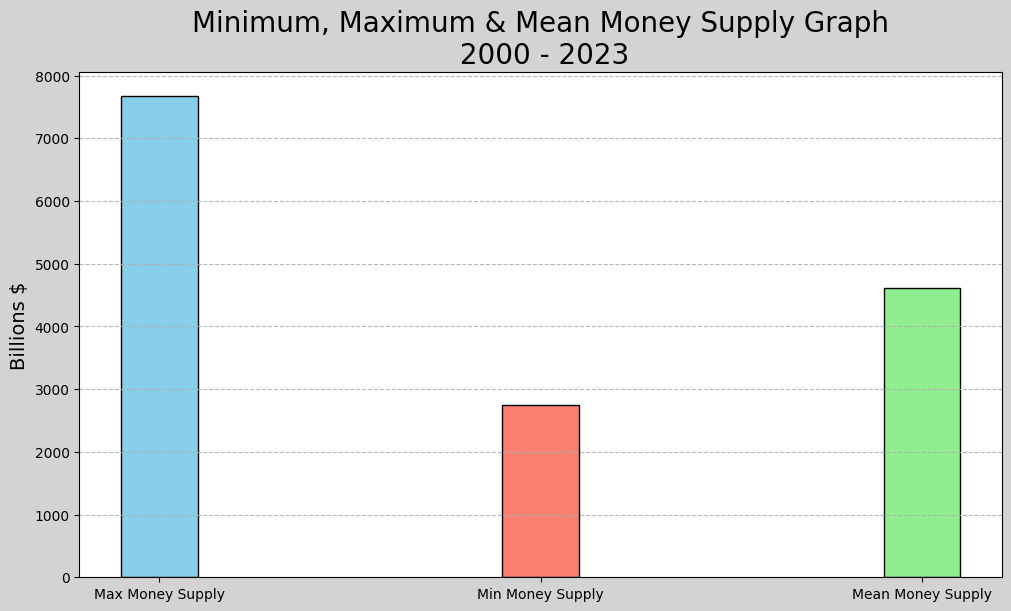

In [9]:
max_m2_2000_2023 = m2_df_2000_2023.max().to_frame(name='Max Money Supply')
min_m2_2000_2023 = m2_df_2000_2023.min().to_frame(name='Min Money Supply')
average_m2_2000_2023 = m2_df_2000_2023.mean().to_frame(name='Mean Money Supply')

chart_info = {
    max_m2_2000_2023.columns[0]: max_m2_2000_2023[max_m2_2000_2023.columns[0]].item(),
    min_m2_2000_2023.columns[0]: min_m2_2000_2023[min_m2_2000_2023.columns[0]].item(),
    average_m2_2000_2023.columns[0]: average_m2_2000_2023[average_m2_2000_2023.columns[0]].item()
}

categories = list(chart_info.keys())
values = list(chart_info.values())
bar_colors = ['skyblue', 'salmon', 'lightgreen']

fig, ax = plt.subplots(figsize=(10,6), layout='constrained')
fig.set_facecolor('lightgray')
bars = ax.bar(categories, values, width=0.2,color=bar_colors, edgecolor='black')

ax.set_facecolor('white')
ax.set_ylabel('Billions $', fontsize=14)
ax.set_title('Minimum, Maximum & Mean Money Supply Graph\n 2000 - 2023', fontsize=20)
ax.grid(axis='y', linestyle='--', alpha=0.9)

plt.show()

